In [ ]:
%matplotlib inline


Creating an image
==================

How to create an image with basic NumPy commands : ``np.zeros``, slicing...

This examples show how to create a simple checkerboard.



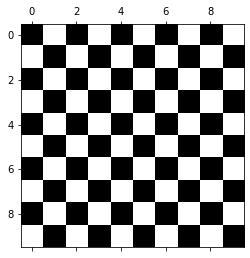

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import 

check = np.zeros((10, 10))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
plt.matshow(check, cmap='gray')
plt.show()

In [4]:
C = [0 2 4 6; 8 10 12 14; 16 18 20 22];
image(C)

SyntaxError: invalid syntax (<ipython-input-4-e24c42058426>, line 1)

In [8]:
from random import randint
import os

#Ship Class
class Ship:
  def __init__(self, size, orientation, location):
    self.size = size
    
    if orientation == 'horizontal' or orientation == 'vertical':
      self.orientation = orientation
    else:
      raise ValueError("Value must be 'horizontal' or 'vertical'.")
    
    if orientation == 'horizontal':
      if location['row'] in range(row_size):
        self.coordinates = []
        for index in range(size):
          if location['col'] + index in range(col_size):
            self.coordinates.append({'row': location['row'], 'col': location['col'] + index})
          else:
            raise IndexError("Column is out of range.")
      else:
        raise IndexError("Row is out of range.")
    elif orientation == 'vertical':
      if location['col'] in range(col_size):
        self.coordinates = []
        for index in range(size):
          if location['row'] + index in range(row_size):
            self.coordinates.append({'row': location['row'] + index, 'col': location['col']})
          else:
            raise IndexError("Row is out of range.")
      else:
        raise IndexError("Column is out of range.")

    if self.filled():
      print_board(board)
      print(" ".join(str(coords) for coords in self.coordinates))
      raise IndexError("A ship already occupies that space.")
    else:
      self.fillBoard()
  
  def filled(self):
    for coords in self.coordinates:
      if board[coords['row']][coords['col']] == 1:
        return True
    return False
  
  def fillBoard(self):
    for coords in self.coordinates:
      board[coords['row']][coords['col']] = 1

  def contains(self, location):
    for coords in self.coordinates:
      if coords == location:
        return True
    return False
  
  def destroyed(self):
    for coords in self.coordinates:
      if board_display[coords['row']][coords['col']] == 'O':
        return False
      elif board_display[coords['row']][coords['col']] == '*':
        raise RuntimeError("Board display inaccurate")
    return True

  
#Settings Variables
row_size = 9 #number of rows
col_size = 9 #number of columns
num_ships = 4
max_ship_size = 5
min_ship_size = 2
num_turns = 40

#Create lists
ship_list = []

board = [[0] * col_size for x in range(row_size)]

board_display = [["O"] * col_size for x in range(row_size)]

#Functions
def print_board(board_array):
  print("\n  " + " ".join(str(x) for x in range(1, col_size + 1)))
  for r in range(row_size):
    print(str(r + 1) + " " + " ".join(str(c) for c in board_array[r]))
  print()

def search_locations(size, orientation):
  locations = []

  if orientation != 'horizontal' and orientation != 'vertical':
    raise ValueError("Orientation must have a value of either 'horizontal' or 'vertical'.")

  if orientation == 'horizontal':
    if size <= col_size:
      for r in range(row_size):
        for c in range(col_size - size + 1):
          if 1 not in board[r][c:c+size]:
            locations.append({'row': r, 'col': c})
  elif orientation == 'vertical':
    if size <= row_size:
      for c in range(col_size):
        for r in range(row_size - size + 1):
          if 1 not in [board[i][c] for i in range(r, r+size)]:
            locations.append({'row': r, 'col': c})

  if not locations:
    return 'None'
  else:
    return locations

def random_location():
  size = randint(min_ship_size, max_ship_size)
  orientation = 'horizontal' if randint(0, 1) == 0 else 'vertical'

  locations = search_locations(size, orientation)
  if locations == 'None':
    return 'None'
  else:
    return {'location': locations[randint(0, len(locations) - 1)], 'size': size,\
     'orientation': orientation}

def get_row():
  while True:
    try:
      guess = int(input("Row Guess: "))
      if guess in range(1, row_size + 1):
        return guess - 1
      else:
        print("\nOops, that's not even in the ocean.")
    except ValueError:
      print("\nPlease enter a number")

def get_col():
  while True:
    try:
      guess = int(input("Column Guess: "))
      if guess in range(1, col_size + 1):
        return guess - 1
      else:
        print("\nOops, that's not even in the ocean.")
    except ValueError:
      print("\nPlease enter a number")

# Create the ships

temp = 0
while temp < num_ships:
  ship_info = random_location()
  if ship_info == 'None':
    continue
  else:
    ship_list.append(Ship(ship_info['size'], ship_info['orientation'], ship_info['location']))
    temp += 1
del temp

# Play Game
os.system('clear')
print_board(board_display)

for turn in range(num_turns):
  print("Turn:", turn + 1, "of", num_turns)
  print("Ships left:", len(ship_list))
  print()
  
  guess_coords = {}
  while True:
    guess_coords['row'] = get_row()
    guess_coords['col'] = get_col()
    if board_display[guess_coords['row']][guess_coords['col']] == 'X' or \
     board_display[guess_coords['row']][guess_coords['col']] == '*':
      print("\nYou guessed that one already.")
    else:
      break

  os.system('clear')

  ship_hit = False
  for ship in ship_list:
    if ship.contains(guess_coords):
      print("Hit!")
      ship_hit = True
      board_display[guess_coords['row']][guess_coords['col']] = 'X'
      if ship.destroyed():
        print("Ship Destroyed!")
        ship_list.remove(ship)
      break
  if not ship_hit:
    board_display[guess_coords['row']][guess_coords['col']] = '*'
    print("You missed!")

  print_board(board_display)
  
  if not ship_list:
    break

# End Game
if ship_list:
  print("You lose!")
else:
  print("All the ships are sunk. You win!")


  1 2 3 4 5 6 7 8 9
1 O O O O O O O O O
2 O O O O O O O O O
3 O O O O O O O O O
4 O O O O O O O O O
5 O O O O O O O O O
6 O O O O O O O O O
7 O O O O O O O O O
8 O O O O O O O O O
9 O O O O O O O O O

Turn: 1 of 40
Ships left: 4

Hit!

  1 2 3 4 5 6 7 8 9
1 O O O O O O O O O
2 O O O X O O O O O
3 O O O O O O O O O
4 O O O O O O O O O
5 O O O O O O O O O
6 O O O O O O O O O
7 O O O O O O O O O
8 O O O O O O O O O
9 O O O O O O O O O

Turn: 2 of 40
Ships left: 4


Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Please enter a number

Ple

KeyboardInterrupt: Interrupted by user

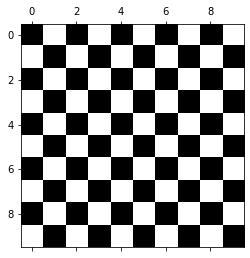

In [40]:
from PIL import Image
myImage = Image.open("C:\sea.jpg")
#myImage.show()

check = np.zeros((10, 10))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
plt.matshow(check, cmap='gray')
plt.show()

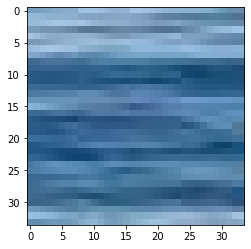

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:\sea.jpg")
plt.imshow(img)